### Import the relevant libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf

#### Data generation

In [2]:
observation = 1000

xs = np.random.uniform(low=-10, high=10, size=(observation,1))
zs = np.random.uniform(low=-10, high=10, size=(observation,1))

generate_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1,(observation,1))
generate_targets = 2* xs - 3*zs + 5 + noise

#np.savez('TF_intro', inputs=generate_inputs, targets=generate_targets)

#### Solving with TensorFlow

In [3]:
input_size = 2
output_size = 1


#### Outlining the model

In [5]:
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])

weights = tf.Variable(tf.random_uniform([input_size, output_size], minval=-0.1,maxval=0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval=-0.1,maxval=0.1))

outputs = tf.matmul(inputs, weights) +  biases

#### Choosing the objective function and the optimization method

In [6]:
mean_loss = tf.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Prepare for execution

In [7]:
sess = tf.InteractiveSession()

#### Initializing variables

In [8]:
initializer = tf.global_variables_initializer()

sess.run(initializer)

### Loading training data

In [9]:
training_data = np.load('TF_intro.npz')

### Learning

In [10]:
for e in range(100):
    
    _, curr_loss = sess.run([optimize, mean_loss],
                            feed_dict = {inputs: training_data['inputs'], targets: training_data['targets']})
    
    print(curr_loss)

239.27255
116.78569
59.596058
32.52313
19.445044
12.922117
9.50017
7.566343
6.3631573
5.5323415
4.9027185
4.3911853
3.9562905
3.5764337
3.2395709
2.9383593
2.667827
2.4242806
2.204758
2.0067577
1.8281103
1.6668941
1.521395
1.3900741
1.2715464
1.164565
1.0680037
0.98084736
0.9021803
0.83117455
0.7670848
0.70923704
0.6570233
0.609895
0.567357
0.5289618
0.49430603
0.463026
0.4347921
0.40930858
0.38630652
0.36554497
0.34680524
0.3298912
0.31462407
0.3008441
0.2884062
0.27717978
0.26704675
0.2579005
0.24964495
0.24219385
0.23546837
0.2293977
0.2239184
0.21897283
0.21450895
0.21047981
0.206843
0.20356043
0.20059747
0.19792312
0.19550931
0.19333057
0.19136417
0.18958917
0.1879871
0.18654099
0.18523584
0.18405765
0.18299429
0.18203448
0.18116814
0.18038617
0.17968044
0.17904337
0.17846838
0.17794935
0.17748095
0.17705816
0.17667651
0.17633203
0.17602114
0.17574048
0.17548718
0.17525855
0.17505218
0.1748659
0.17469779
0.17454602
0.17440905
0.17428547
0.17417386
0.17407313
0.17398222
0.17390017


### Plotting the data

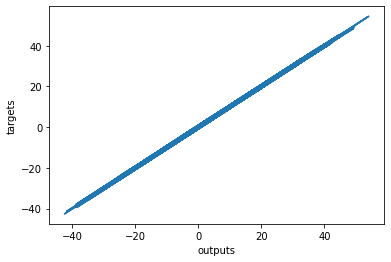

In [11]:
out = sess.run([outputs],
               feed_dict = {inputs: training_data['inputs']})
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()